<b><h1> Sysc 4906 A Introduction To Data Science Discussion Forum 2 </b></h1>

|    Title                        |    Author          |
|---------------------------------|--------------------|
| Top Grossing Movies Web Scraping| Raj Sandhu         |
|                                 |                    |

This notebook shall scrape data from a wikipedia page outlining top grossing movies and other related information and provide some interesting insights.

<b> Import Libraries </b>

In [143]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

<b> Perform Web Scraping </b>

In [144]:
url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"

# Print a useful error message if we cannot connect to the website from which data will be scraped.
try :

  #Get response from website. Make sure there is a connection.
  response = requests.get(url)

  #Scrape desired table from wiki page into a pandas dataframe.
  df = pd.read_html(url)[0]

  #Perform data cleaning operations to obtain value.
  df = df.drop("Reference(s)", axis = 1)
  df["Worldwide gross"] = df["Worldwide gross"].str.replace("$", "")
  df["Worldwide gross"] = df["Worldwide gross"].str.replace(",", "")
  df["Worldwide gross"] = df["Worldwide gross"].str.replace("$", "")
  df["Worldwide gross"] = df["Worldwide gross"].str.replace("F8", "")
  df["Worldwide gross"] = df["Worldwide gross"].str.replace("F", "")
  df["Peak"] = df["Peak"].str.replace("RK", "")
  df["Peak"] = df["Peak"].str.replace("TS3", "")
  df["Peak"] = df["Peak"].str.replace("DM2", "")
  df["Worldwide gross"] = pd.to_numeric(df["Worldwide gross"], downcast = "integer")
  df["Year"] = pd.to_numeric(df["Year"], downcast = "integer")

  #Output the full dataframe.
  print(df.to_string()) 
except Exception as e :

  #Print the error message. Can be useful if we want to implement logging purposes for this script in the future.
  print("ERROR: " + str(e))

    Rank Peak                                          Title  Worldwide gross  Year
0      1    1                                         Avatar       2847246203  2009
1      2    1                              Avengers: Endgame       2797501328  2019
2      3    1                                        Titanic       2187425379  1997
3      4    3                   Star Wars: The Force Awakens       2068223624  2015
4      5    4                         Avengers: Infinity War       2048359754  2018
5      6    6                        Spider-Man: No Way Home       1740845239  2021
6      7    3                                 Jurassic World       1671713208  2015
7      8    7                                  The Lion King       1656943394  2019
8      9    3                                   The Avengers       1518812988  2012
9     10    4                                      Furious 7       1516045911  2015
10    11   10                                      Frozen II       145002693

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


<b>Exploratory Data Visualizations to Obtain Value </b>

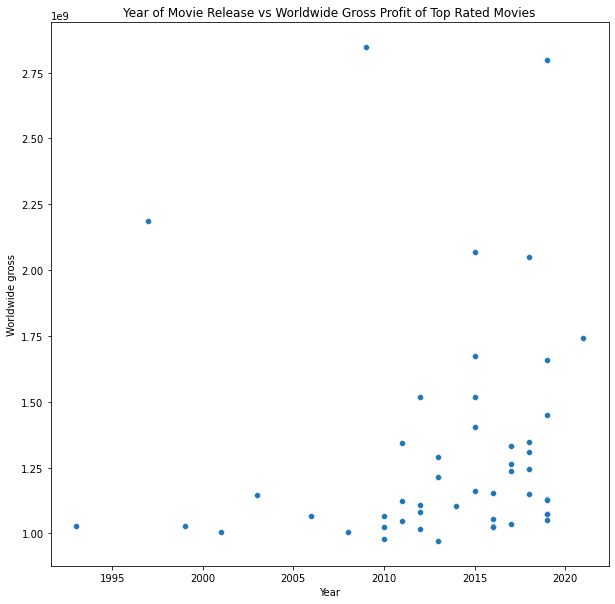

In [145]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(x = df["Year"], y = df["Worldwide gross"], data = df, ax = ax, ci = None)
plt.title("Year of Movie Release vs Worldwide Gross Profit of Top Rated Movies")
plt.show()

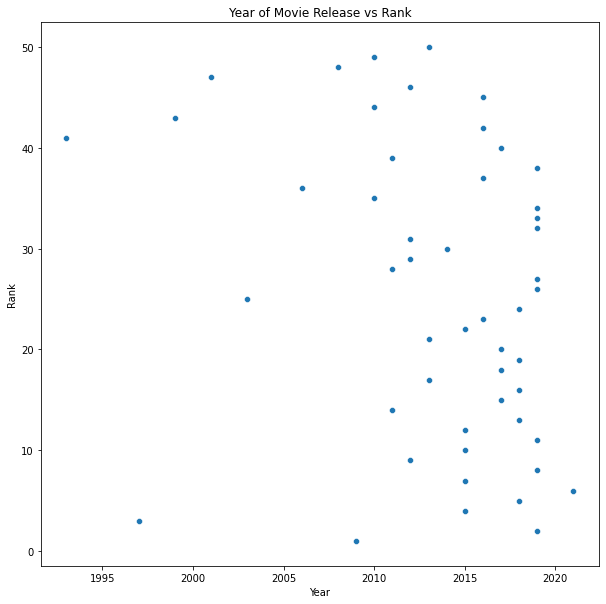

In [146]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(x = df["Year"], y = df["Rank"], data = df, ax = ax, ci = None)
plt.title("Year of Movie Release vs Rank")
plt.show()